In [729]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,4)
# plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [759]:
## Read Log File
log_dir = 'experiment_agan_100_100_bs1_w40_noisemost128conv_genmask_personpool_noiselabel_gapgfc_128res'
with open('../checkpoints/'+log_dir+'/loss_log.txt', 'r') as f:
    log = f.read()

## Create directory for saved plots    
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    
## Save Plots    
SAVE = True

## Max number of plot iterations
MAX_ITER = 1000000000



In [760]:
llog = log.split('\n')
split_llog = [e.replace('(', '').replace(')', '').replace(',', '').split() for e in llog]
# llog[:3]

In [761]:
llog[:3]

['================ Training Loss (Mon May 31 21:44:46 2021) ================',
 '(epoch: 1, iters: 100, lr: 0.0002000, t_comp: 0.060, t_load: 0.129) G_image: 0.516 G_person: 0.604 G_L1: 14.425 D_image_real: 0.511 D_image_fake: 0.481 D_person_real: 0.327 D_person_fake: 0.049 acc_D_image_real: 0.480 acc_D_image_fake: 0.560 acc_D_person_real: 0.000 acc_D_person_fake: 1.000 ',
 '(epoch: 1, iters: 200, lr: 0.0002000, t_comp: 0.054, t_load: 0.003) G_image: 0.324 G_person: 1.433 G_L1: 10.223 D_image_real: 0.309 D_image_fake: 0.290 D_person_real: 0.005 D_person_fake: 0.020 acc_D_image_real: 0.520 acc_D_image_fake: 0.550 acc_D_person_real: 1.000 acc_D_person_fake: 1.000 ']

In [762]:
# Create list of keys from log data
keys = [k.replace(':','') for k in split_llog[1] if ':' in k]
print('logged data:')
print(keys)

# Create empty dict for log data
log_dict = {k:[] for k in keys}
log_dict['i'] = []


# Populate log dict
count = 0
for entry in split_llog:
#     print(entry)
    if entry and entry[0] == 'epoch:' and count < MAX_ITER:
        log_dict['i'].append(count)
        count += 1
        key = ''
        for e in entry:
            if e[:-1] in keys:
                key = e[:-1]
            else:
                data = float(e) if '.' in e else int(e)
                log_dict[key].append(data)


# print(log_dict)

    

logged data:
['epoch', 'iters', 'lr', 't_comp', 't_load', 'G_image', 'G_person', 'G_L1', 'D_image_real', 'D_image_fake', 'D_person_real', 'D_person_fake', 'acc_D_image_real', 'acc_D_image_fake', 'acc_D_person_real', 'acc_D_person_fake']


In [763]:
count

2400

In [764]:
log_dict['iters'] = [int(x/32) for x in log_dict['iters']]
log_dict['iters'][:5]

[3, 6, 9, 12, 15]

---

## Learning Rate

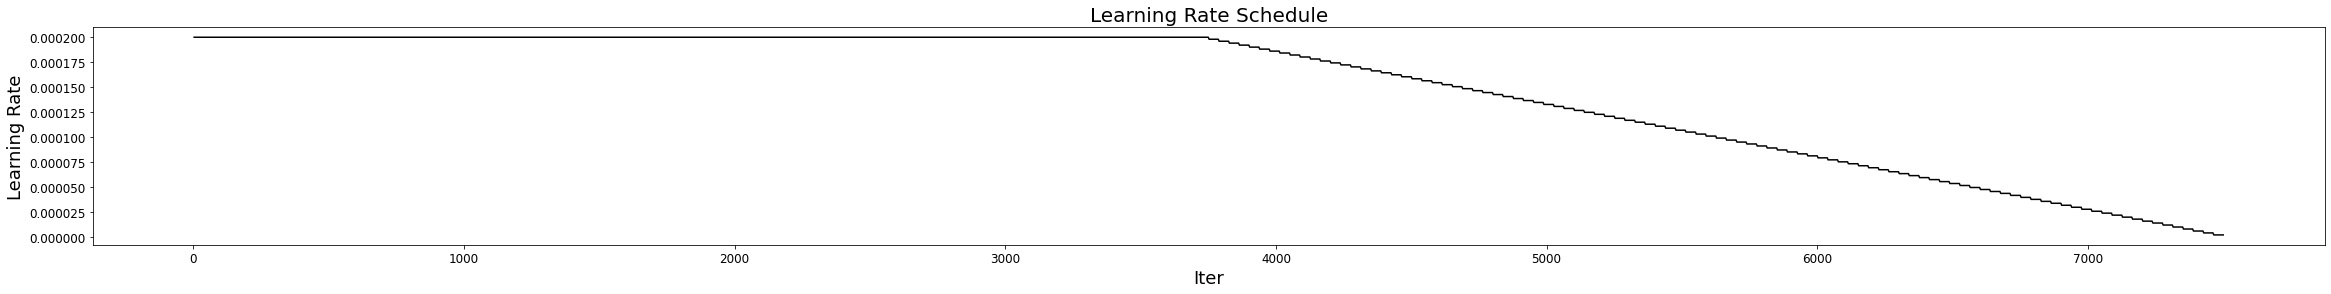

In [765]:
# Data for plotting
x = log_dict['iters']
y = log_dict['lr']
fig, ax = plt.subplots()
ax.plot(x, y, 'black')

ax.set(xlabel='Iter', ylabel='Learning Rate',
       title='Learning Rate Schedule')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_learning_rate.png")
plt.show()

## G_image loss plot

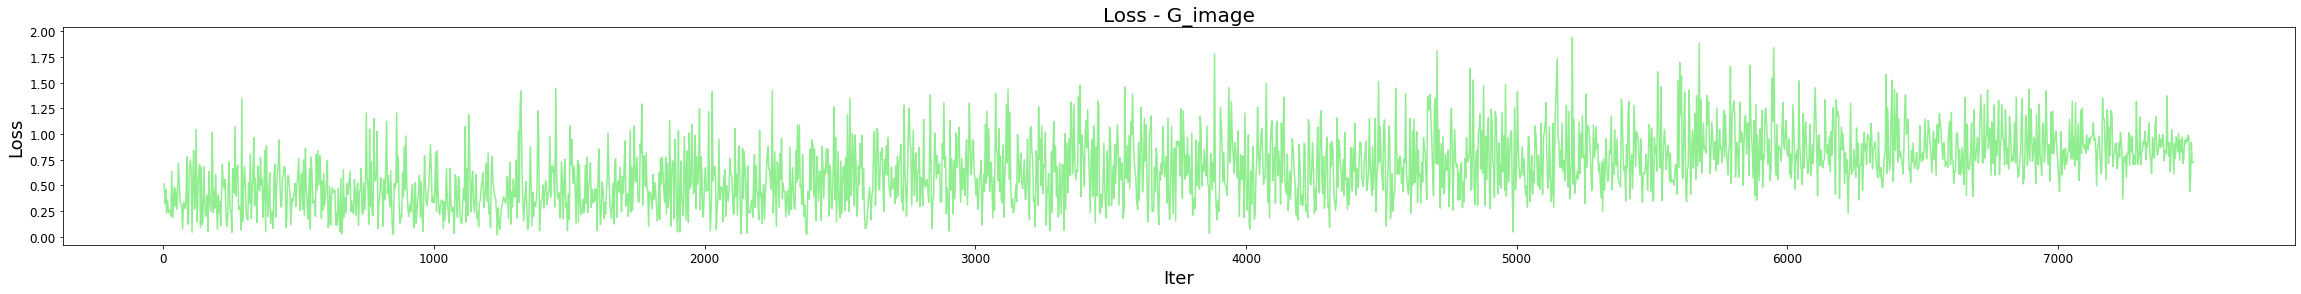

In [766]:
# Data for plotting
x = log_dict['iters']
try:
    y = log_dict['G_image']
except:
    y = log_dict['G_GAN_image']
fig, ax = plt.subplots()
ax.plot(x, y, 'lightgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_image')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_image.png")
plt.show()



## D_image_fake loss plot

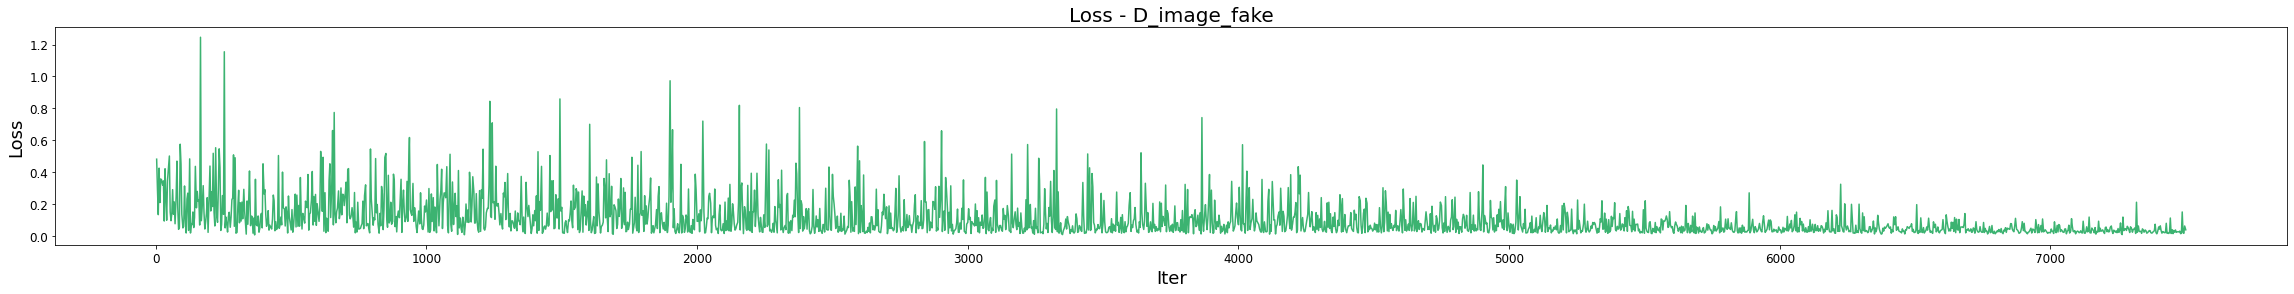

In [767]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_image_fake']
fig, ax = plt.subplots()
ax.plot(x, y, 'mediumseagreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_fake')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_fake.png")
plt.show()

## D_image_real loss plot

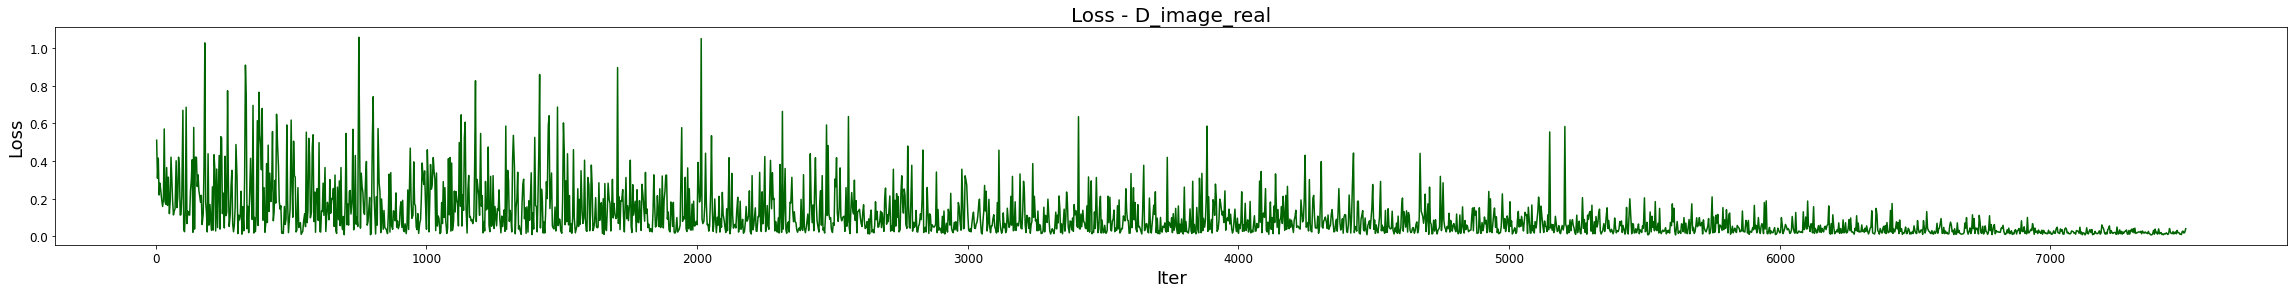

In [768]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_image_real']
fig, ax = plt.subplots()
# ax.plot(x, y, 'forestgreen')
ax.plot(x, y, 'darkgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_real')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_real.png")
plt.show()

---
---
## G_person loss plot

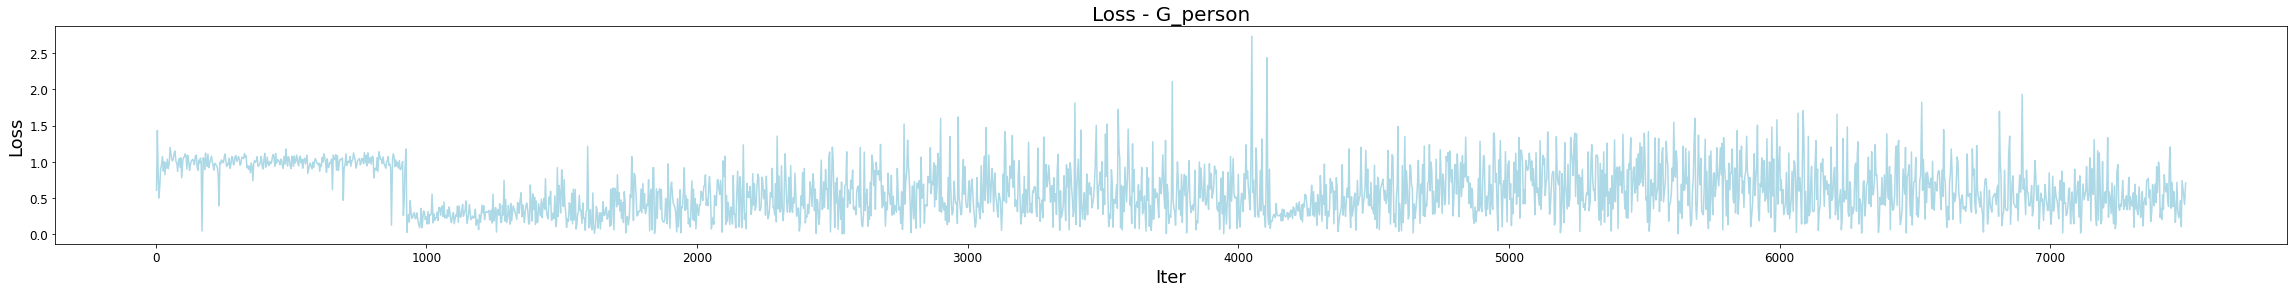

In [769]:
# Data for plotting
x = log_dict['iters']
try:
    y = log_dict['G_person']
except:
    y = log_dict['G_GAN_person']
fig, ax = plt.subplots()
ax.plot(x, y, 'lightblue')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_person')

# plt.ylim(0, 3)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_person.png")
plt.show()

## D_person_fake loss plot

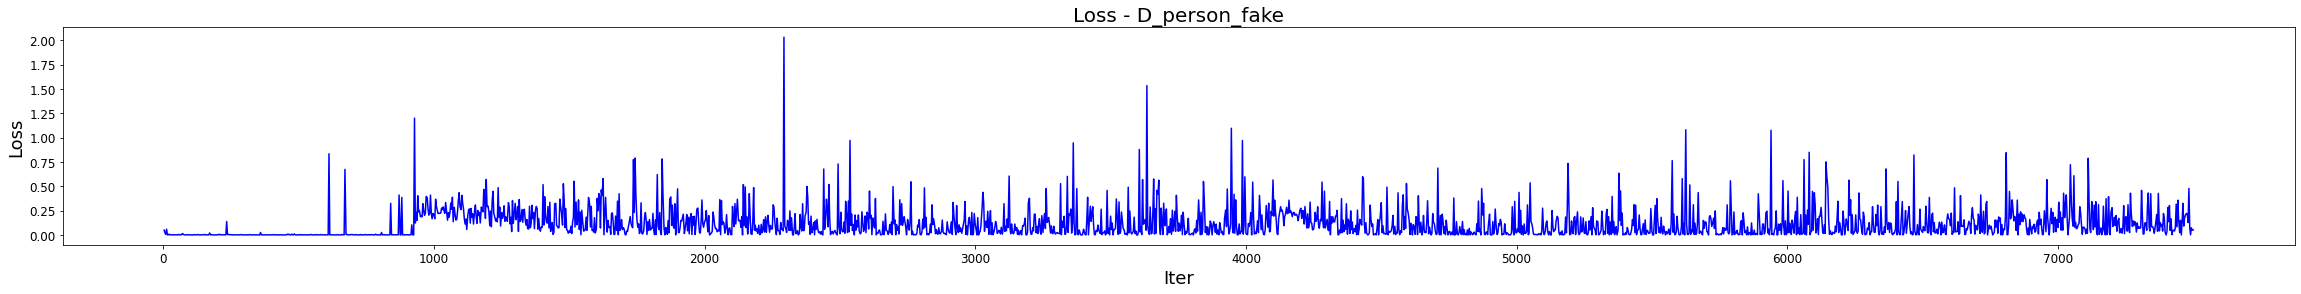

In [770]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_person_fake']
# print(x)
# print(y)
fig, ax = plt.subplots()
ax.plot(x, y, 'blue')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_person_fake')
# plt.ylim(0, 3)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_fake.png")
plt.show()

## D_person_real plot

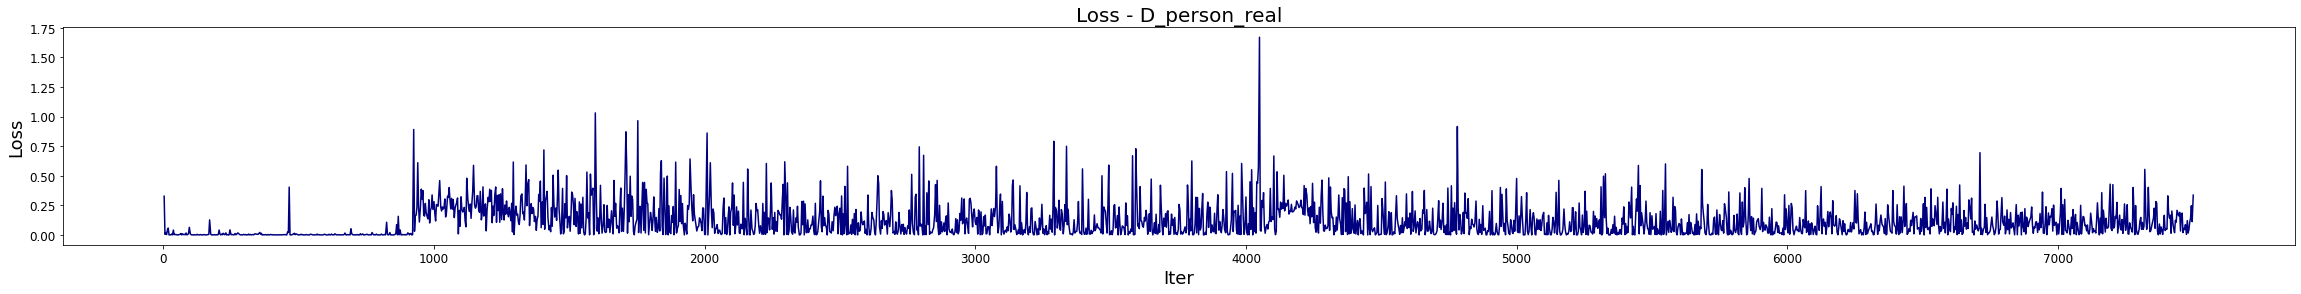

In [771]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_person_real']
# print(x)
# print(y)
fig, ax = plt.subplots()
ax.plot(x, y, 'navy')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_person_real')
# plt.ylim(0, 3.5)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_real.png")
plt.show()

---
---
## G_L1 loss plot

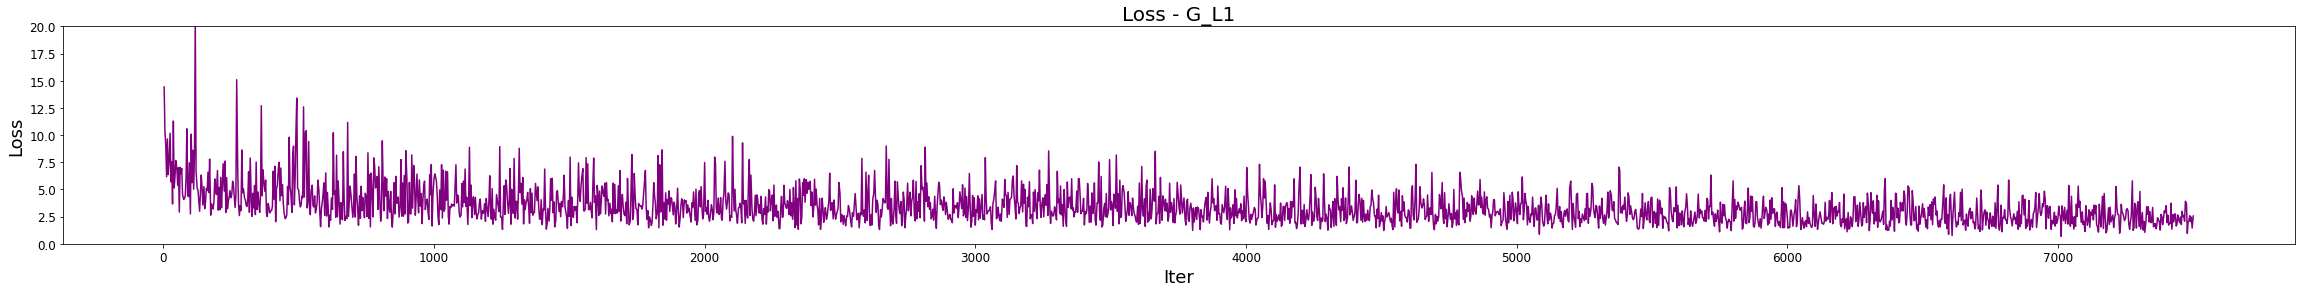

In [772]:
# Data for plotting
x = log_dict['iters']
y = log_dict['G_L1']
fig, ax = plt.subplots()
ax.plot(x, y, 'purple')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_L1')
plt.ylim(0, 20)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_L1.png")
plt.show()

---
---
## Accuracy Plot - D Image Fake

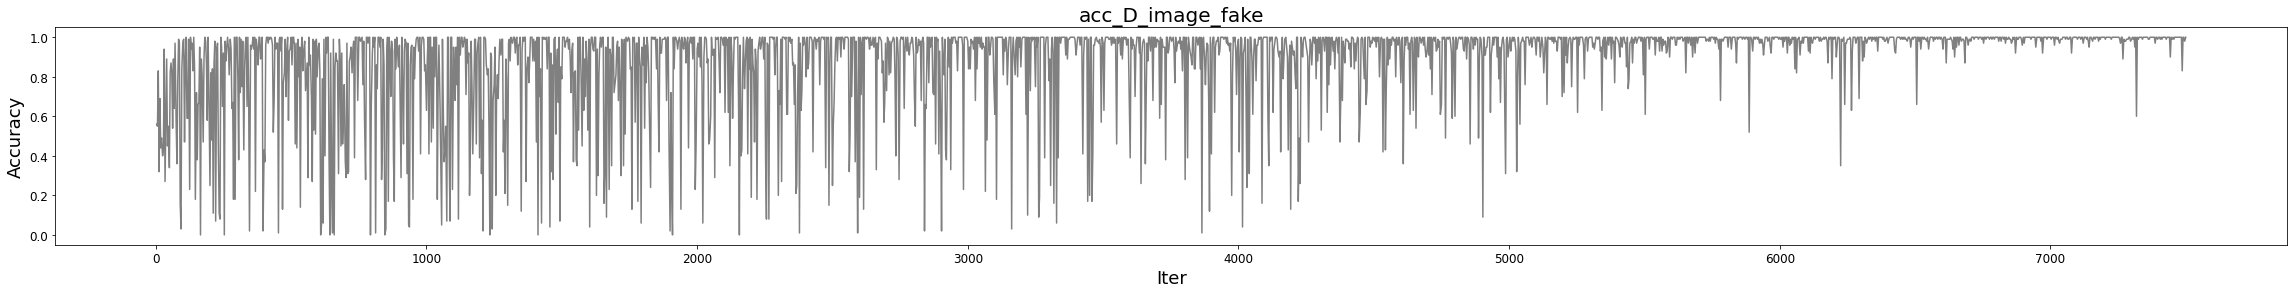

In [773]:
# Data for plotting
data_name = 'acc_D_image_fake'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Image Real

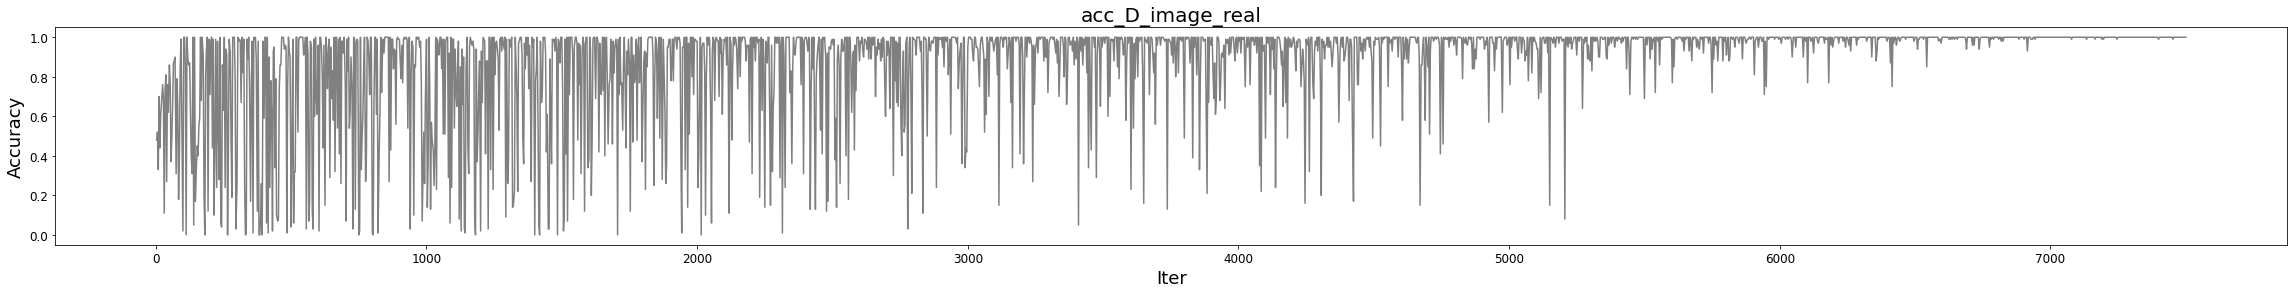

In [774]:
# Data for plotting
data_name = 'acc_D_image_real'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Person Fake

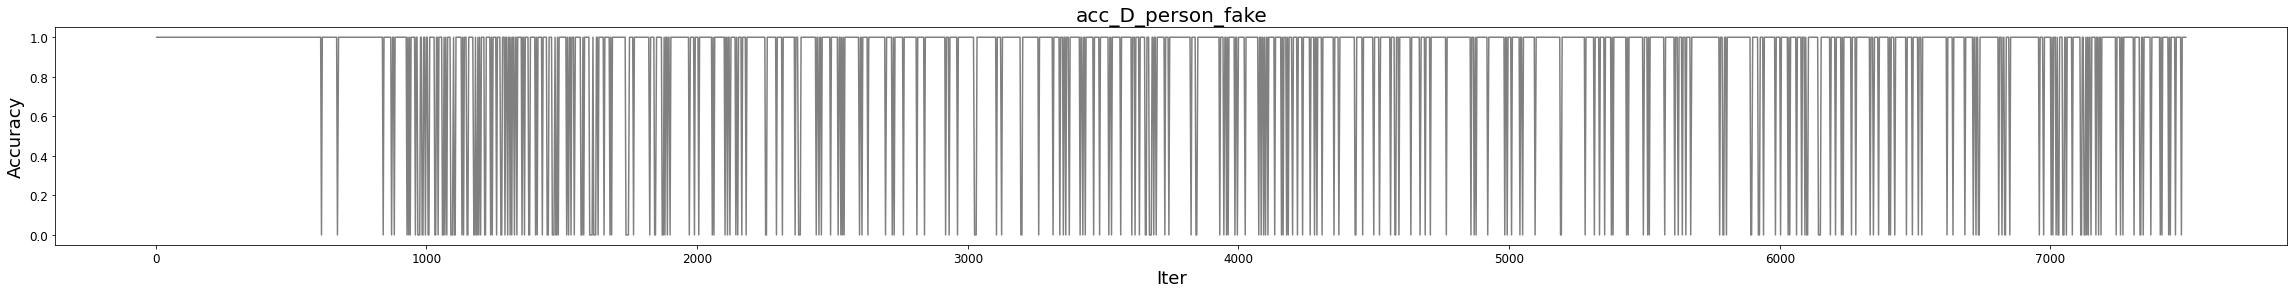

In [775]:
# Data for plotting
data_name = 'acc_D_person_fake'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Person Real

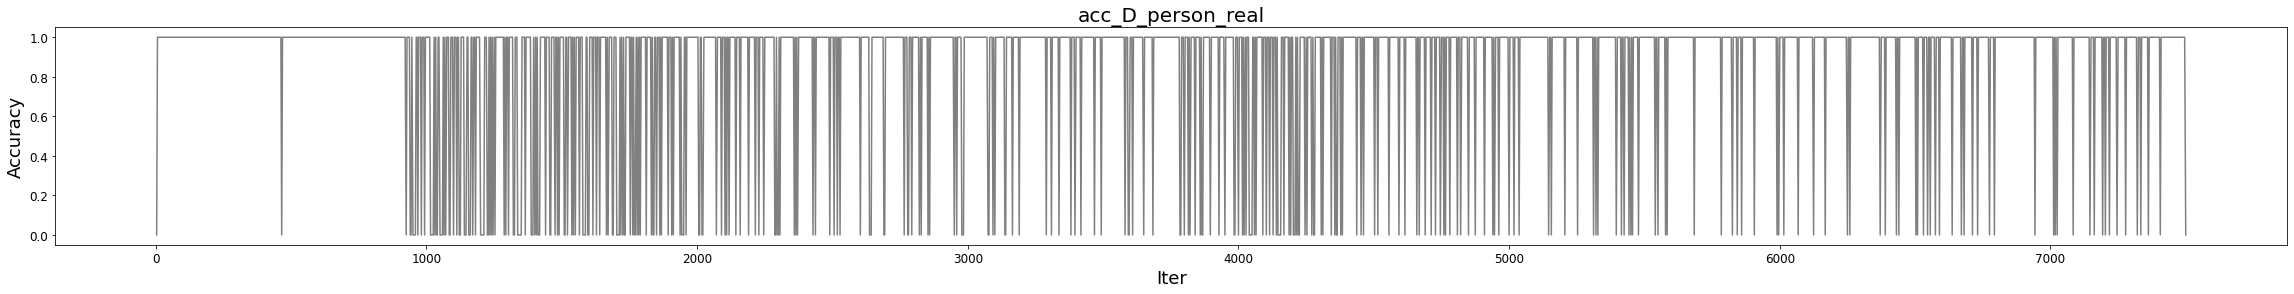

In [776]:
# Data for plotting
data_name = 'acc_D_person_real'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

---  
---
# Validation Data

In [777]:
## Read Log File
with open('../checkpoints/'+log_dir+'/validation_loss_log.txt', 'r') as f:
    validation_log = f.read()

In [778]:
val_llog = validation_log.split('\n')
val_split_llog = [e.replace('(', '').replace(')', '').replace(',', '').split() for e in val_llog]
val_llog[:10]

['================ Validation Loss (Mon May 31 21:44:46 2021) ================',
 '(epoch: 1, iters: 1200, sample: 0, lr: 0.0002000) D_image_real: 0.324 D_image_fake: 0.155 D_person_real: 0.000 D_person_fake: 0.001 acc_D_image_real: 0.310 acc_D_image_fake: 0.840 acc_D_person_real: 1.000 acc_D_person_fake: 1.000 ',
 '(epoch: 1, iters: 1200, sample: 1, lr: 0.0002000) D_image_real: 0.300 D_image_fake: 0.285 D_person_real: 0.008 D_person_fake: 0.002 acc_D_image_real: 0.440 acc_D_image_fake: 0.590 acc_D_person_real: 1.000 acc_D_person_fake: 1.000 ',
 '(epoch: 1, iters: 1200, sample: 2, lr: 0.0002000) D_image_real: 0.323 D_image_fake: 0.154 D_person_real: 0.000 D_person_fake: 0.011 acc_D_image_real: 0.410 acc_D_image_fake: 0.810 acc_D_person_real: 1.000 acc_D_person_fake: 1.000 ',
 '(epoch: 1, iters: 1200, sample: 3, lr: 0.0002000) D_image_real: 0.160 D_image_fake: 0.262 D_person_real: 0.000 D_person_fake: 0.009 acc_D_image_real: 0.800 acc_D_image_fake: 0.550 acc_D_person_real: 1.000 acc_D_p

In [779]:
# Create list of keys from validation log data
val_keys = [k.replace(':','') for k in val_split_llog[1] if ':' in k]
print('logged data:')
print(val_keys)

standard_keys = ['epoch', 'iters','lr']

# Create empty dict for log data
# val_log_dict = {k:[] for k in val_keys}
# val_log_dict = {k:[[],[],[],[],[]] for k in val_keys}
# val_log_dict = {k:([] if k in standard_keys else [[],[],[],[],[]]) for k in val_keys}
val_log_dict = {k:(set() if k in standard_keys else [[],[],[],[],[]]) for k in val_keys}
val_log_dict['i'] = []


# Populate log dict
count = 0
for entry in val_split_llog:
#     print(entry)
    if entry and entry[0] == 'epoch:' and count < MAX_ITER:
        val_log_dict['i'].append(count)
        count += 1
        key = ''
        next_sample = False  ## if next data indicates which image sample
        standard_key = False
        for e in entry:
            if e[:-1] in val_keys:
                key = e[:-1]
                if key == 'sample':
                    next_sample = True
                else:
                    next_sample = False
                if key in standard_keys:
                    standard_key = True
                else:
                    standard_key = False
            else:
                data = float(e) if '.' in e else int(e)    
                if next_sample == True:
                    img_sample = data
                if standard_key == True:
                    val_log_dict[key].add(data)
                else:
                    val_log_dict[key][img_sample].append(data)

# print()
# print(val_log_dict.keys())

logged data:
['epoch', 'iters', 'sample', 'lr', 'D_image_real', 'D_image_fake', 'D_person_real', 'D_person_fake', 'acc_D_image_real', 'acc_D_image_fake', 'acc_D_person_real', 'acc_D_person_fake']


## D_image_fake loss plot - VALIDATION

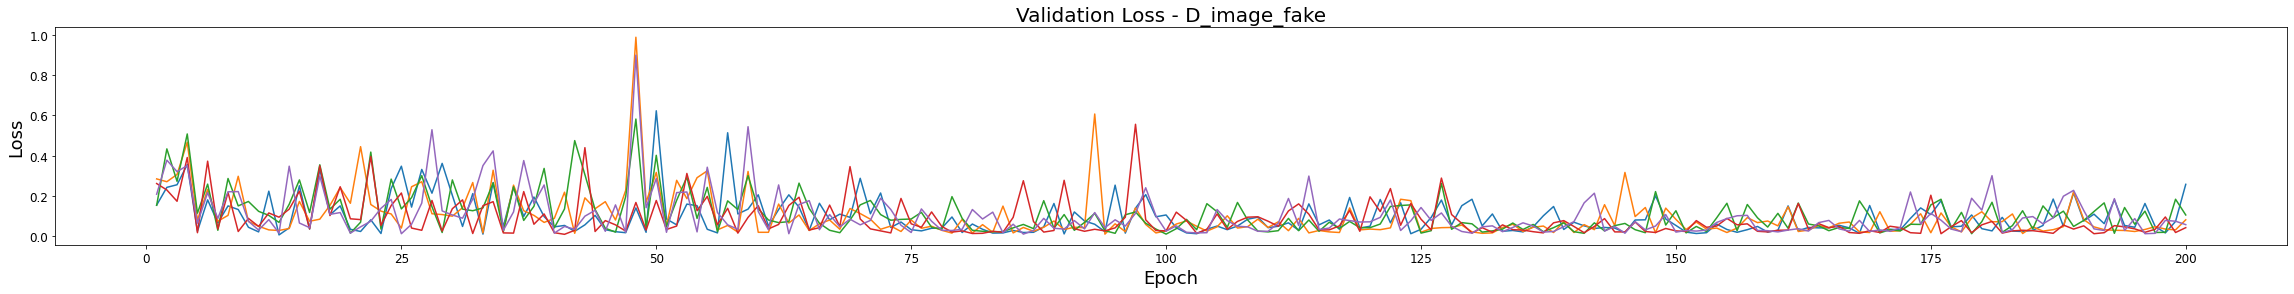

In [780]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_image_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
plt.show()

## D_image_real loss plot - VALIDATION

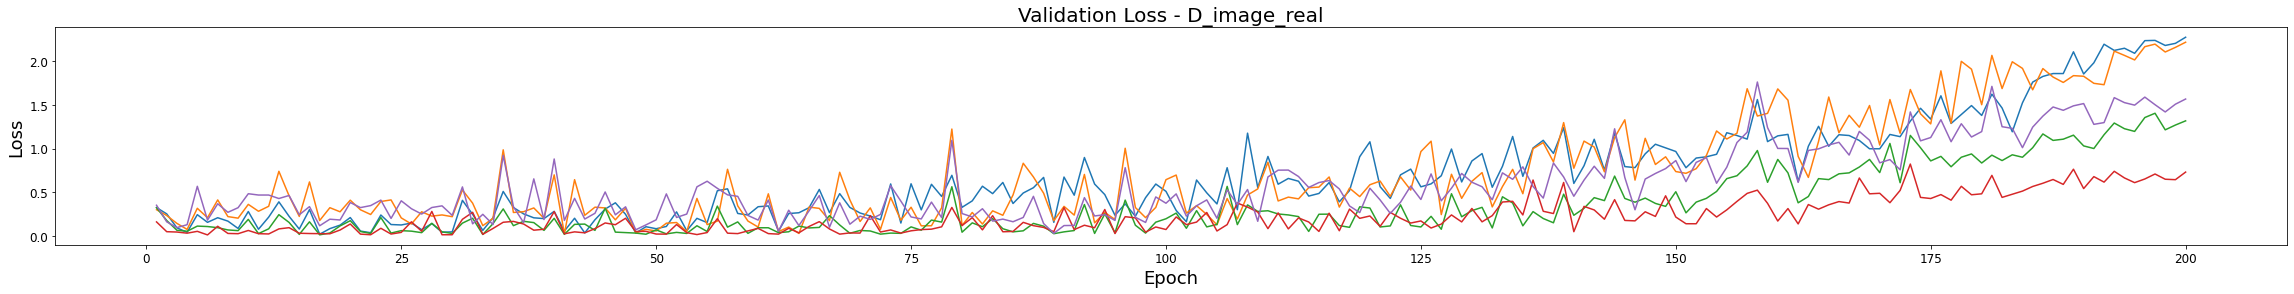

In [781]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_image_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
plt.show()

## D_person_fake loss plot  - VALIDATION

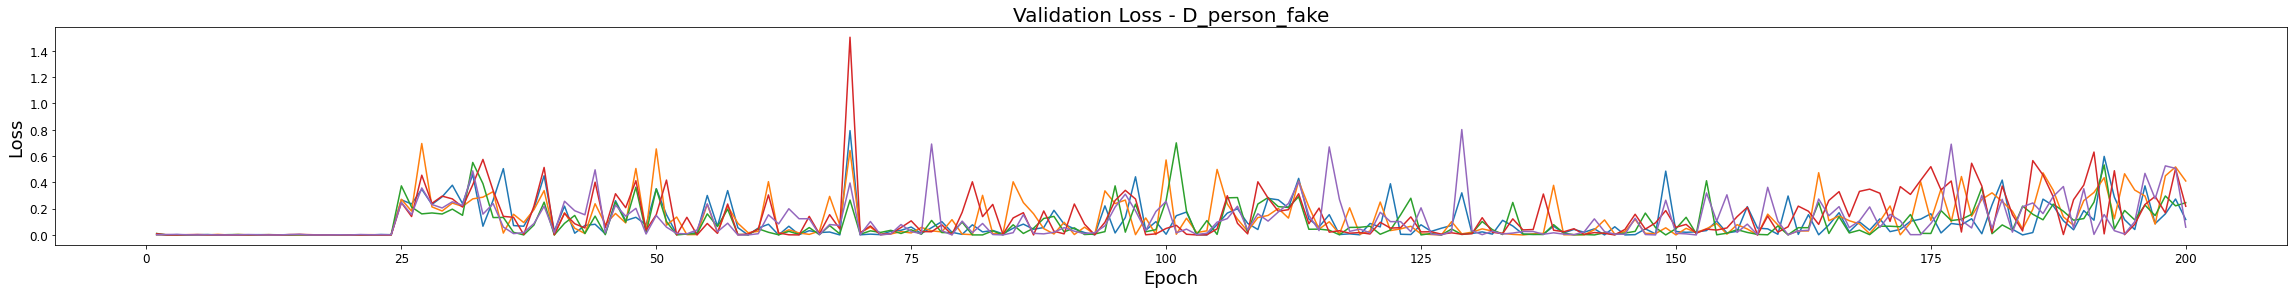

In [782]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_person_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
plt.show()

## D_person_real plot - VALIDATION

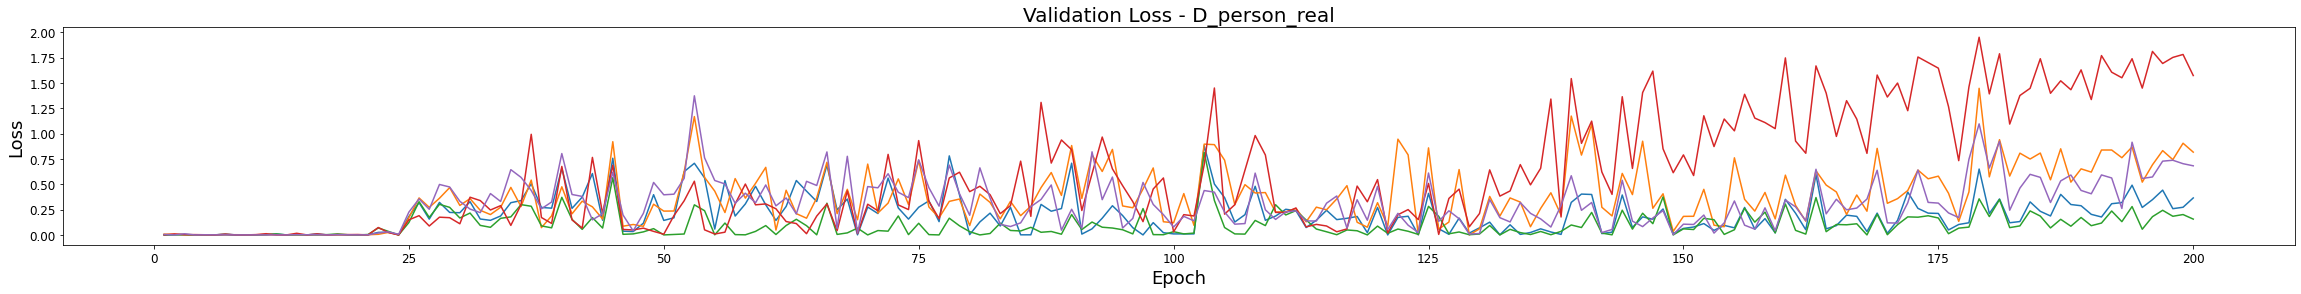

In [783]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_person_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
plt.show()

---
---
## Accuracy Plot - D Image Fake - VALIDATION

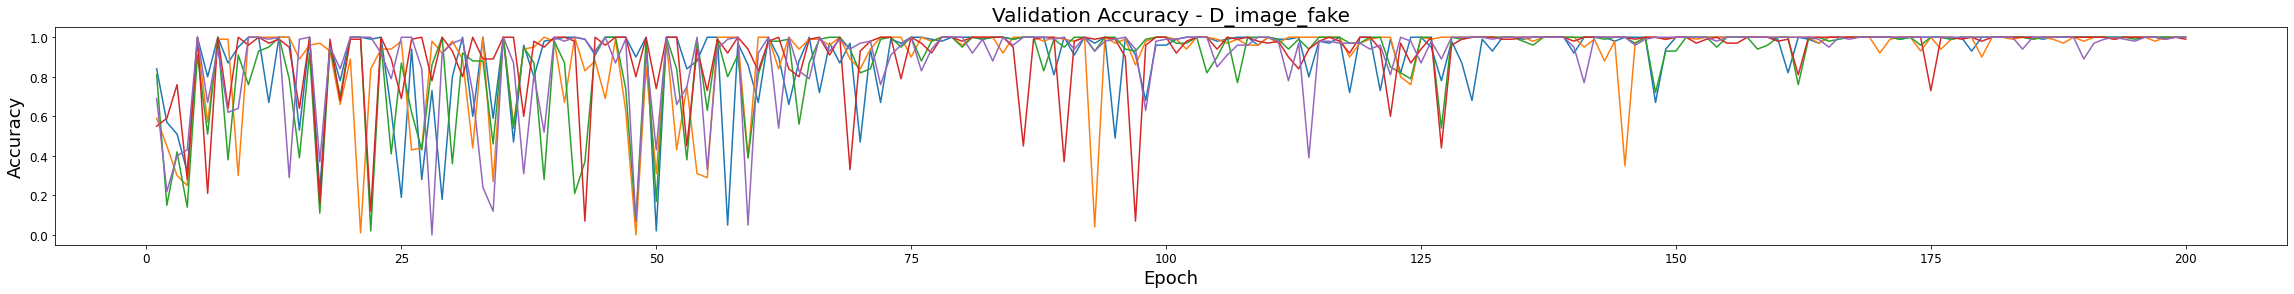

In [784]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_image_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
plt.show()

## Accuracy Plot - D Image Real - VALIDATION

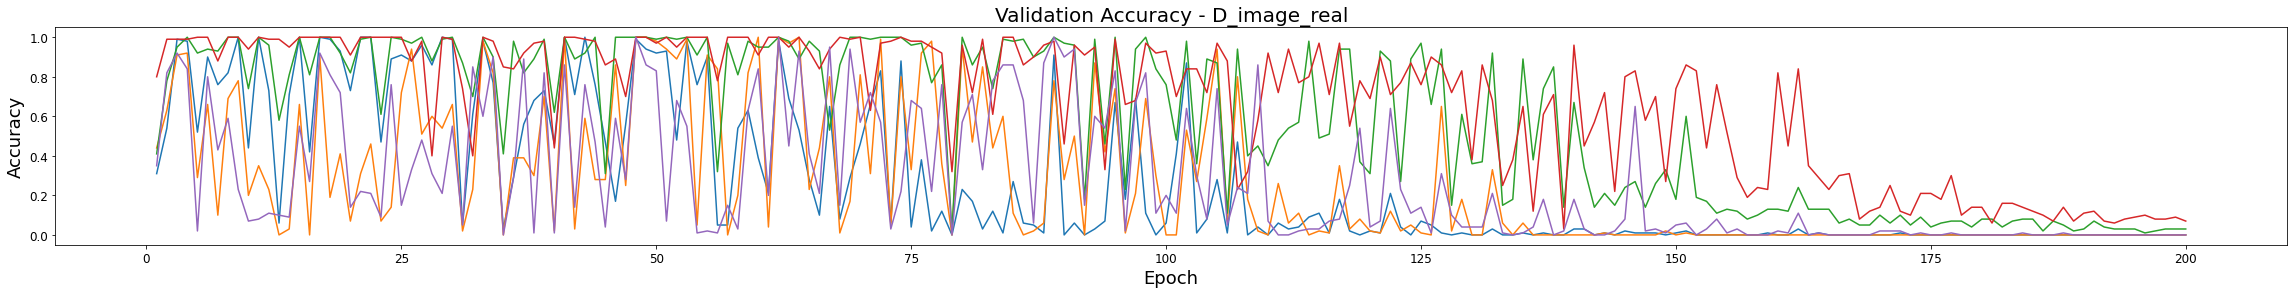

In [785]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_image_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
plt.show()

## Accuracy Plot - D Person Fake - VALIDATION

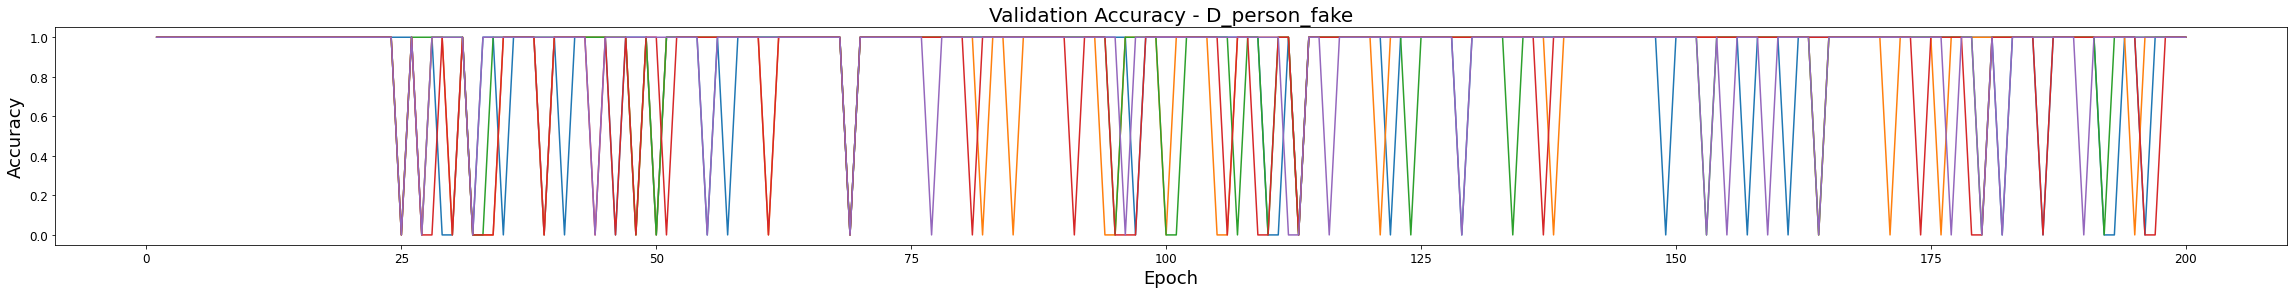

In [786]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_person_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
plt.show()

## Accuracy Plot - D Person Real - VALIDATION

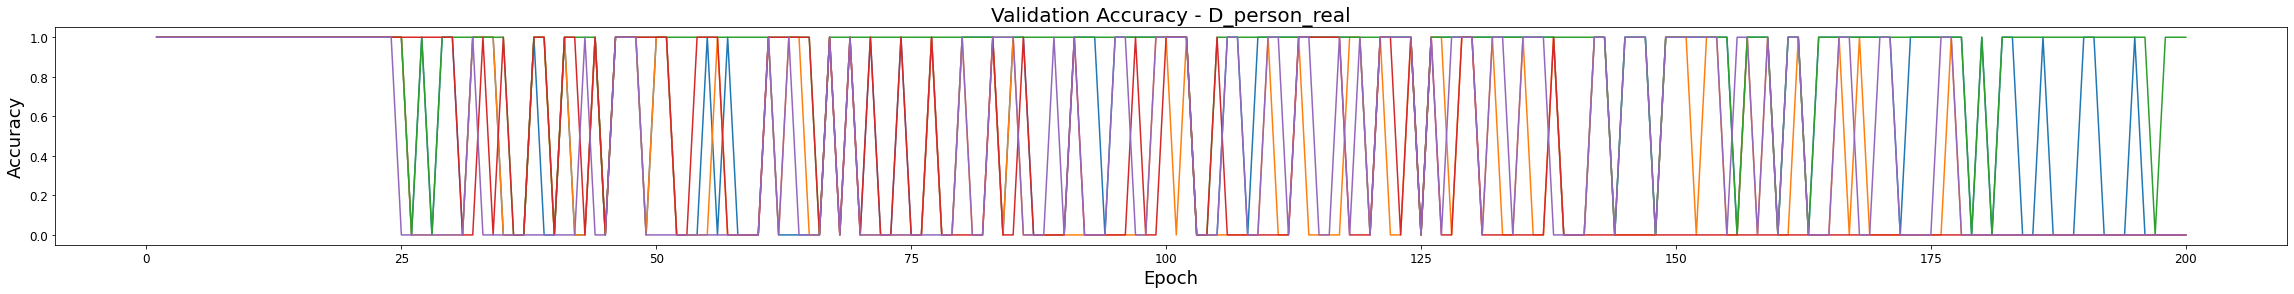

In [787]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_person_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
plt.show()